In [6]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [7]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

%matplotlib nbagg

$A = amplitude$

$\phi = phase$

$\nu = frequency$

In [8]:
data = pandas.read_csv('uber-raw-data-apr14.csv')


In [9]:
data.tail()


,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [10]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [11]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [12]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [13]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [14]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


In [15]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
#data['Date/Time']=data['Date/Time'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

In [21]:
from bqplot import pyplot as plt

In [19]:
figure,ax=plt.subplots(ncols=2,figsize=(10,5))
seaborn.countplot(x='Date/Time',data=data,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')

AttributeError: module 'bqplot.pyplot' has no attribute 'subplots'

In [26]:
hist=hist(data.dom, bins=30, rwidth=0.8, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title('Frequency by Date of month  - uber - apr 2014')

TypeError: 'Hist' object is not callable

<IPython.core.display.Javascript object>


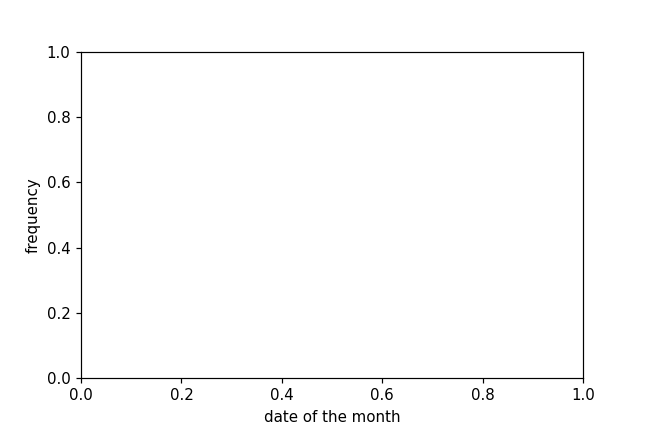

Figure(axes=[Axis(orientation='vertical', scale=LinearScale()), Axis(scale=LinearScale())], fig_margin={'top':…

In [22]:
fig_hist = plt.figure( title='Frequency by Date of month  - uber - apr 2014')
hist = plt.hist(data.dom, bins=25)
xlabel('date of the month')
ylabel('frequency')
fig_hist

In [23]:
slider = widgets.IntSlider(min=1, max=100, v_model=30)
slider

IntSlider(value=1, min=1)

In [24]:
slider.value

1

In [25]:
widgets.link((hist, 'bins'), (slider, 'value'));

In [ ]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

In [ ]:
bar(range(1, 31), by_date)

In [ ]:
by_date_sorted = by_date.sort_values()
by_date_sorted

In [ ]:
bar(range(1, 31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - apr 2014 in ascending order')
;

In [ ]:
#15 june 2014 was father's day(it was on sunday)so most poeple must have gone to their homez on 13 (friday) which goves 2 days t spend time with their family

In [ ]:
fig_hist = plt.figure( title='frequency of pick ups based on hours:uber-april-2014')
hist = plt.hist(data.hour, bins=25)
xlabel('date of the month')
ylabel('frequency')
fig_hist

In [ ]:
slider = widgets.IntSlider(min=1, max=100, v_model=30)
slider

In [ ]:
slider.value

In [ ]:
widgets.link((hist, 'bins'), (slider, 'value'));

In [ ]:
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
xlabel('days')
ylabel('frequency')
title('frequency of pick ups based on days:uber-april 2014')

In [ ]:
fig_hist = plt.figure( title='frequency of pick ups based on days:uber-april 2014')
hist = plt.hist(data.weekday, bins=7)
xlabel('days')
ylabel('frequency')
fig_hist

In [ ]:
slider = widgets.IntSlider(min=1, max=100, v_model=30)
slider

In [ ]:
slider.value

In [ ]:
widgets.link((hist, 'bins'), (slider, 'value'));

In [ ]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

In [ ]:
seaborn.heatmap(by_cross)
yticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
title('cross analysis of frequency based on hour and weekday uber-april 2014')

In [ ]:
plt.hist(data['Lat'], bins=100,range=(40.5,41.1))
xlabel('latitude')
ylabel('frequency of pick ups')
title('frequency of pick ups according to latitud-uber -april -2014')
;

In [ ]:
fig_hist = plt.figure( title='frequency of pick ups according to latitude-uber -april -2014')
hist = plt.hist(data['Lat'], bins=100)
xlabel('latitude')
ylabel('frequency')
fig_hist

In [ ]:
slider = widgets.IntSlider(min=1, max=100, v_model=30)
slider

In [ ]:
slider.value

In [ ]:
widgets.link((hist, 'bins'), (slider, 'value'));

In [ ]:
plt.hist(data['Lon'], bins=100,range=(-74.2,-73.7))
xlabel('longitude')
ylabel('frequency')
title('frequency of pick ups based on longitude-uber-april 2014')
;

In [ ]:
fig_hist = plt.figure( title='frequency of pick ups according to longitude-uber -april -2014')
hist = plt.hist(data['Lon'], bins=100)
xlabel('longitude')
ylabel('frequency')
fig_hist

In [ ]:
slider = widgets.IntSlider(min=1, max=100, v_model=30)
slider

In [ ]:
slider.value

In [ ]:
widgets.link((hist, 'bins'), (slider, 'value'));

In [ ]:
plt.hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
plt.hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')
;

In [ ]:
figure(figsize=(20, 20))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pylab as py
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.cluster import KMeans  
from scipy.spatial.distance import cdist 
from sklearn.datasets import make_blobs 
from sklearn.cluster import AgglomerativeClustering 
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from keplergl import KeplerGl
import geopandas as gpdo

In [ ]:
cluster = data[['Lat','Lon']]
cluster.dtypes

In [ ]:
KMeans(algorithm= 'auto', copy_x=True, init='k_means++', max_iter=300,n_clusters=14, n_init=10,n_jobs=None, precompute_distances = 'auto',random_state=None, tol = 0.0001, verbose=0)

In [ ]:
pca=PCA(n_components=2)
pca.fit(cluster)
x_red=pca.transform(cluster)
x_red.shape

In [ ]:
x_red

In [ ]:
py.scatter(x_red[:,0],x_red[:,1],cmap='RdYlBu')
py.show()

In [ ]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=3,random_state=0)
k_means.fit(cluster)
y_pred=k_means.predict(cluster)

In [ ]:
py.scatter(x_red[:,0],x_red[:,1],c=y_pred,cmap='RdYlBu')

In [ ]:
df = pd.DataFrame(x_red)
d = df.to_numpy()

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=6, max_iter=300, random_state = 12345)
kmeans.fit(cluster)

In [ ]:
centroids = kmeans.cluster_centers_
centroids

In [ ]:
new_location = [(40.6556,-73.5631)]
kmeans.predict(new_location)

In [ ]:
clocation = pd.DataFrame(centroids, columns =['Lat', 'Lon'])
clocation

In [ ]:
plt.scatter(clocation['Lat'], clocation['Lon'], marker = "x", color = 'R', s = 200)
plt.show()

In [ ]:
import pandas as pd #importing the Pandas Library as 'pd'
from keplergl import KeplerGl #importing KeplerGl
import geopandas as gpd #importing geopandas as 'gpd'
#Pandas in action below
df = pd.read_csv('kmean-apr14-loc.csv')#Reading the active construction data set into pandas for processing
df.head()#Checking to see if data was properly imported!

In [ ]:

import pandas as pd #importing the Pandas Library as 'pd'
from keplergl import KeplerGl #importing KeplerGl
import geopandas as gpd #importing geopandas as 'gpd'
#Pandas in action below
df = pd.read_csv('kmean-apr14-loc.csv')#Reading the active construction data set into pandas for processing
df.head()#Checking to see if data was properly imported!

In [ ]:
#Create a basemap 
map = KeplerGl(height=600, width=800)
map #show the map

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitutde, df.latitude))

In [ ]:
map.add_data(data=gdf, name="kmean-apr14") 